In [3]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

## Percentiles ##

In [5]:
x = make_array(43,20,51,7,28,34)

In [9]:
x_sorted = np.sort(x)

In [ ]:
## 55th percentile

In [11]:
np.arange(1, 7)/6

array([ 0.16666667,  0.33333333,  0.5       ,  0.66666667,  0.83333333,
        1.        ])

In [13]:
x_sorted.item(3)

34

4.199999999999999

## Discussion Question

- 1 min 

In [29]:
s = make_array(1,5,3,7,9)

In [31]:
percentile(50,s) == 5

True

## Inference: Estimation

In [33]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


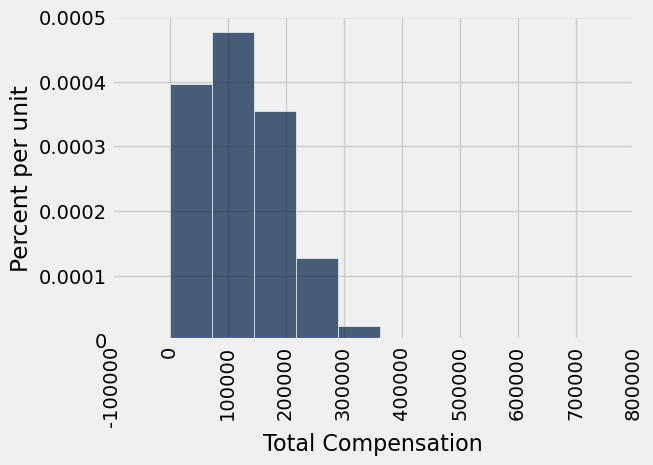

In [35]:
sf.hist('Total Compensation')

In [37]:
sf.sort('Total Compensation', descending=True).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235


In [39]:
# Who made the least money
sf.sort('Total Compensation', descending=False).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0


In [41]:
# $15/hr, 20 hr/wk, 50 weeks

min_salary = 15 * 20 * 50
min_salary

15000

In [43]:
sf = sf.where('Salary', are.above(min_salary))
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


### Population Distribution

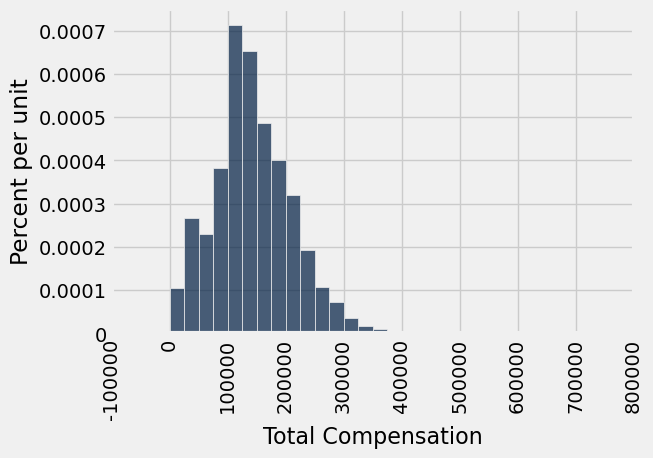

In [45]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

In [47]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

135747.0

### An Empirical Distribution

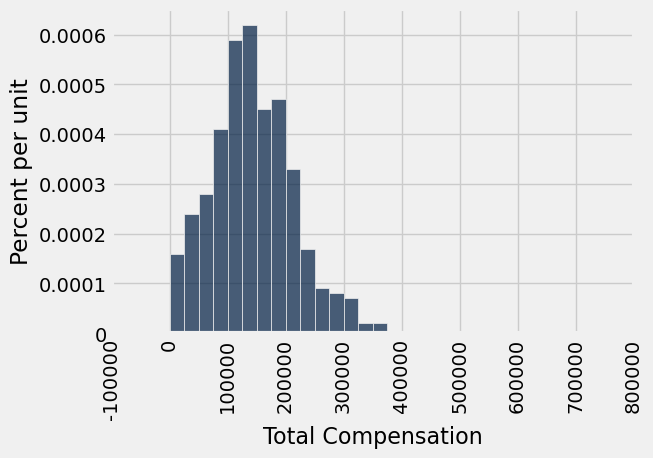

In [69]:
our_sample = sf.sample(400, with_replacement=False)
our_sample.hist('Total Compensation', bins=sf_bins)

In [59]:
percentile(50, our_sample.column('Total Compensation'))

135672.0

## Variability of the Estimate / Quantifying Uncertainty

In [61]:
def generate_sample_median(samp_size):
    new_sample = sf.sample(samp_size, with_replacement=False)
    return percentile(50, new_sample.column('Total Compensation'))

In [63]:
generate_sample_median(400)

136870.0

In [65]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(400)
    sample_medians = np.append(sample_medians, new_median)

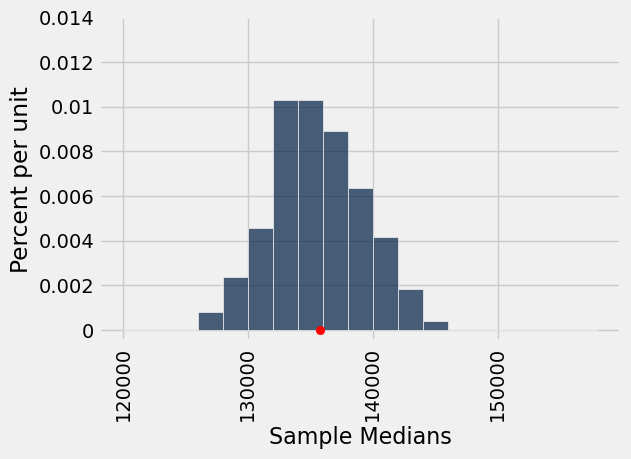

In [67]:
med_bins = np.arange(120000, 160000, 2000)
Table().with_column('Sample Medians', sample_medians).hist(bins=med_bins)

plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color='red');

# Bootstrap

In the bootstrap technique, we:
 - sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

#### Default behavior of `tbl.sample`: at random with replacement, the same number of times as rows of `tbl`

In [81]:
bootstrap_sample = our_sample.sample()

134697.0

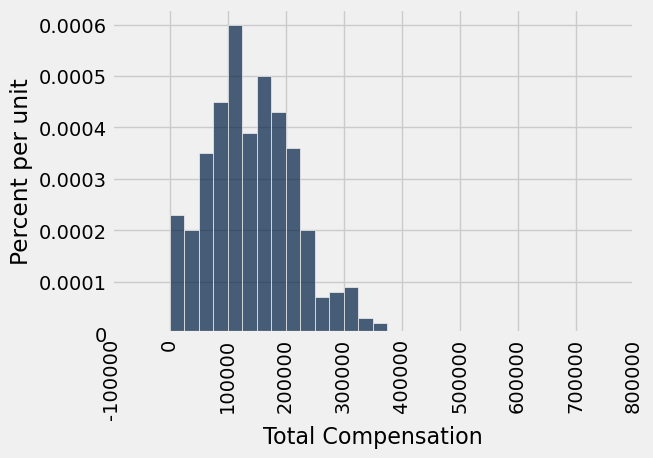

In [83]:
bootstrap_sample.hist('Total Compensation', bins=sf_bins)
percentile(50, bootstrap_sample.column('Total Compensation'))

In [85]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = our_sample.sample()
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [103]:
one_bootstrap_median()

138245.0

In [105]:
num_repetitions = 1000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

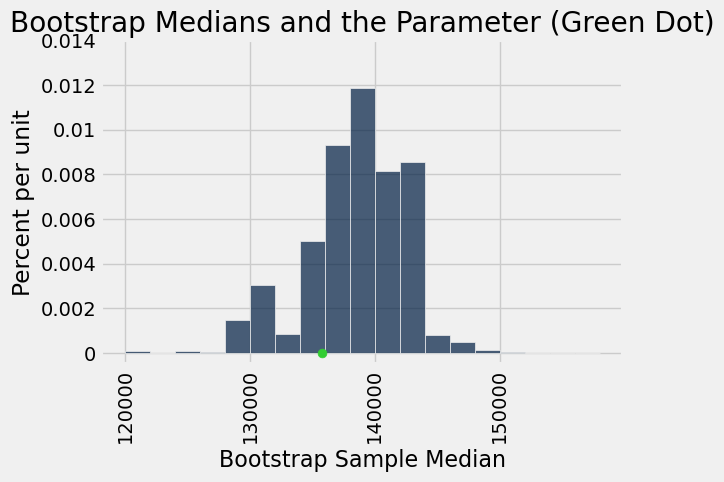

In [107]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates 

In [113]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([ 129926.,  144851.])

In [ ]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);